In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import dataset 
df = pd.read_csv('.././data/csv/11-GaussianNaiveBayes.csv')

## 21.1 Tutorial Dataset

In [28]:
x1 = list(df['Gaussian Naïve Bayes'][3:13])
x1 = [float(s) for s in x1]

x2 = list(df['Unnamed: 1'][3:13])
x2 = [float(s) for s in x2]

Text(0,0.5,'x2')

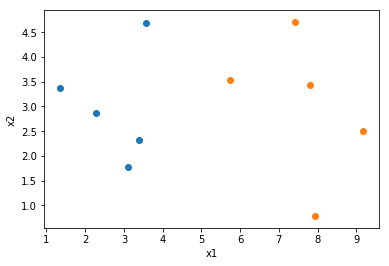

In [11]:
fig = plt.figure()

plt.scatter(x1[:len(x1)//2],x2[:len(x2)//2])
plt.scatter(x1[len(x1)//2:],x2[len(x2)//2:])
plt.xlabel("x1")
plt.ylabel("x2")

## 21.3.1 Class Probabilities

In [15]:
def count_specified_value(target_value, _list):
    cnt = 0
    for i in _list:
        if i == target_value:
            cnt += 1
    return cnt

In [22]:
y = df['Unnamed: 2'][3:13]
y = [float(s) for s in y]

y0 = count_specified_value(0,y)
y1 = count_specified_value(1,y)

p0 = y0/(y0+y1)
print('P0：'+str(p0))
print('---------')
p1 = y1/(y0+y1)
print('P1：'+str(p1))

P0：0.5
---------
P1：0.5


## 21.3.2 Conditional Probabilities

In [41]:
import statistics
x1_y0_mean = statistics.mean(x1[:len(x1)//2])
print("x1_y0_mean："+str(x1_y0_mean))
x1_y1_mean = statistics.mean(x1[len(x1)//2:])
print("x1_y1_mean："+str(x1_y1_mean))

x2_y0_mean = statistics.mean(x2[:len(x2)//2])
print("x2_y0_mean："+str(x2_y0_mean))
x2_y1_mean = statistics.mean(x2[len(x2)//2:])
print("x2_y1_mean："+str(x2_y1_mean))

x1_y0_mean：2.7420144012
x1_y1_mean：7.6146523718
x2_y0_mean：3.0054686692
x2_y1_mean：2.9914679790000003


In [43]:
x1_y0_stdev = statistics.stdev(x1[:len(x1)//2])
print("x1_y0_stdev："+str(x1_y0_stdev))
x1_y1_stdev = statistics.stdev(x1[len(x1)//2:])
print("x1_y1_stdev："+str(x1_y1_stdev))

x2_y0_stdev = statistics.stdev(x2[:len(x2)//2])
print("x2_y0_stdev："+str(x2_y0_stdev))
x2_y1_stdev = statistics.stdev(x2[len(x2)//2:])
print("x2_y1_stdev："+str(x2_y1_stdev))

x1_y0_stdev：0.9265683289298018
x1_y1_stdev：1.2344321550313704
x2_y0_stdev：1.1073295894898725
x2_y1_stdev：1.4541931384601618


## 21.4 Make Prediction with Gaussian Naive Bayes

In [51]:
import math
def pdf(value,mean,std):
    return 1/(std*(2*math.pi)**0.5)*math.e**-((value-mean)**2/(2*std**2))

In [60]:
x1 = list(df['Gaussian Naïve Bayes'][25:35])
x1 = [float(s) for s in x1]

print("--------P(pdf(x1)|Y=0)--------")
pdf_x1_y0 = []
for i in x1:
    ans = pdf(i,x1_y0_mean,x1_y0_stdev)
    pdf_x1_y0.append(ans)
    print(ans)
    
x2 = list(df['Unnamed: 1'][25:35])
x2 = [float(s) for s in x2]

print("--------P(pdf(x2)|Y=0)--------")
pdf_x2_y0 = []
for i in x2:
    ans = pdf(i,x2_y0_mean,x2_y0_stdev)
    pdf_x2_y0.append(ans)
    print(ans)
    
print("--------Output Y=0--------")
output_y0 = []
for i in range(len(pdf_x2_y0)):
    ans = pdf_x1_y0[i]*pdf_x2_y0[i]*p0
    output_y0.append(ans)
    print(ans)

--------P(pdf(x1)|Y=0)--------
0.3362559189806222
0.39789537964422417
0.1378989256527223
0.28539525215390316
0.38030115759804806
1.2328271766438062e-06
0.002254526671779386
1.5003336416741338e-11
1.5196175162923096e-07
6.318136633411705e-08
--------P(pdf(x2)|Y=0)--------
0.29932128413549713
0.19559060386412516
0.3414378694988815
0.11495884192721373
0.35746801170840853
0.11225550899085125
0.32148821825264823
0.32610077857613606
0.3354277026970906
0.04883074555526275
--------Output Y=0--------
0.05032427673372076
0.03891229878967957
0.02354195769052508
0.016404353839568928
0.06797274932849018
6.919582110595227e-08
0.00036240188135671394
2.4462998433695227e-12
2.5486090623409403e-08
1.5425966116475567e-09


In [62]:
print("--------P(pdf(x1)|Y=1)--------")
pdf_x1_y1 = []
for i in x1:
    ans = pdf(i,x1_y1_mean,x1_y1_stdev)
    pdf_x1_y1.append(ans)
    print(ans)
    
print("--------P(pdf(x2)|Y=1)--------")
pdf_x2_y1 = []
for i in x2:
    ans = pdf(i,x2_y1_mean,x2_y1_stdev)
    pdf_x2_y1.append(ans)
    print(ans)
    
print("--------Output Y=0--------")
output_y1 = []
for i in range(len(pdf_x2_y1)):
    ans = pdf_x1_y1[i]*pdf_x2_y1[i]*p1
    output_y1.append(ans)
    print(ans)

--------P(pdf(x1)|Y=1)--------
0.0009340506299685852
0.00041486723880612524
8.049754130439041e-07
0.0015573221630848745
2.848450435660791e-05
0.3193246934374877
0.10264594879667971
0.14579890306715512
0.3198314479712074
0.31215873901519764
--------P(pdf(x2)|Y=1)--------
0.2474752012176147
0.19407231695876162
0.2652782467174633
0.13989465220040678
0.2733360347029761
0.1379617648530351
0.2558965839320992
0.2597723928760463
0.2624636835757837
0.08737062963391638
--------Output Y=0--------
0.0001155771837994577
4.025712313269429e-05
1.0677123311147636e-07
0.00010893052118437184
3.892920735657427e-06
0.0220272991338951
0.013133373825769753
0.018937264964228807
0.04197206997894985
0.0136367527867436


## Final Prediction

In [66]:
prediction = []
acc_cnt = 0

for i in range(len(output_y0)):
    if output_y0[i] > output_y1[i]:
        print(0)
        prediction.append(0)
        if y[i] == 0:
            acc_cnt += 1
    else:
        print(1)
        prediction.append(1)
        if y[i] == 1:
            acc_cnt += 1
print('-----------------------')
print('Accuracy：'+str(acc_cnt/len(prediction)*100))

0
0
0
0
0
1
1
1
1
1
-----------------------
Accuracy：100.0


## Chapter 23